In [2]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
from data import util
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import adfuller
from evolutionary.nsga import NSGA

In [3]:
# Create a SQLite database connection
db_conn = sqlite3.connect("PairsTradingData.db")

# Instantiate the OHLCV class with the database connection
ohlc_reader = util.OHLCV(db_conn)

# Call the load method with the required parameters
assets = ["LINKUSDT", "MATICUSDT"]
exchanges = ["binance" for _ in range(len(assets))]
since_date = "2024-01-01 00:01:00"

data_frames = ohlc_reader.load(assets, exchanges, since_date)

[3, 4]


In [4]:
for df in data_frames: # normalise
    df['close'] = df['close'] / df.iloc[0,3]

data_frames[0]

,,open,high,low,close,volume,volume base,tradecount
unix time,timestamp,,,,,,,
1704931140000,2024-01-10 23:59:00,15.063,15.073,15.058,1.000000,1779.12,26806.48548,74
1704931080000,2024-01-10 23:58:00,15.045,15.072,15.045,0.999403,4226.12,63661.09594,170
1704931020000,2024-01-10 23:57:00,15.015,15.049,15.015,0.998142,33164.52,498476.26629,325
1704930960000,2024-01-10 23:56:00,15.005,15.018,14.996,0.996085,5359.96,80449.66326,202
1704930900000,2024-01-10 23:55:00,14.983,15.005,14.976,0.995555,2820.89,42299.35346,104
...,...,...,...,...,...,...,...,...
1704067500000,2024-01-01 00:05:00,15.009,15.014,15.003,0.996019,4185.30,62810.05773,105
1704067440000,2024-01-01 00:04:00,14.998,15.013,14.996,0.995820,2739.61,41109.95521,122
1704067380000,2024-01-01 00:03:00,14.967,15.000,14.962,0.995024,6259.63,93770.03952,209


In [14]:
def plot(functions, population=None):
    nsga = NSGA(functions)
    if population is not None: population = nsga.generate_population()
    print("Generation 0")
    for i in range(20):
        population = nsga.evolve(population)
        print("Generation ", i+1)
        print("Average Norm: ", nsga.avg_objective(population, 0))
        print("Average NZC: ",
              nsga.avg_objective(population, 1))
        print(population)

def nzc(series): # counts how many sign changes in the spread 
    return np.where(np.diff(np.signbit(series)))[0].size


# Below are some objective objectives to minimise
# Note: to maximise f, put -f as your objective function
#functions = [lambda x: np.linalg.norm(x[0]*data_frames[0]["close"] - x[1]*data_frames[1]["close"]), lambda x: -np.std(x[0]*data_frames[0]["close"] - x[1]*data_frames[1]["close"])]
functions = [lambda x: np.linalg.norm(x[0]*data_frames[0]["close"] - x[1]*data_frames[1]["close"]), lambda x: -nzc(x[0]*data_frames[0]["close"] - x[1]*data_frames[1]["close"])]
#functions = [lambda x: np.linalg.norm(x[0]*data_frames[0]["close"] - x[1]*data_frames[1]["close"]), lambda x: np.linalg.norm(x[0]*data_frames[0]["close"] - x[1]*data_frames[1]["close"])]

# initial population
population = np.array([[-0.70965696, -0.68596719],
 [-0.70965361, -0.68581161],
 [-0.70969827, -0.68541736],
 [-0.70925322, -0.6811406 ],
 [-0.70925322, -0.6811406 ],
 [-0.70925322, -0.6811406 ],
 [-0.70929788, -0.68074635],
 [-0.70929453, -0.68059077],
 [ 0.7701089 ,  0.74701565],
 [ 0.7701089 ,  0.74701565]])

plot(functions, population)



Generation 0
Generation  1
Average Norm:  79.15986758164848
Average NZC:  0.0
Generation  2
Average Norm:  40.84445612553925
Average NZC:  0.0
Generation  3
Average Norm:  27.547506371970307
Average NZC:  0.0
Generation  4
Average Norm:  18.86962476162421
Average NZC:  0.0
Generation  5
Average Norm:  10.797122894065808
Average NZC:  -6.3
Generation  6
Average Norm:  7.235475023366325
Average NZC:  -7.9
Generation  7
Average Norm:  4.81068116211595
Average NZC:  -24.2
Generation  8
Average Norm:  3.8379087447821076
Average NZC:  -50.7
Generation  9
Average Norm:  3.1743788061708518
Average NZC:  -87.6
Generation  10
Average Norm:  2.6405007261715543
Average NZC:  -118.2
Generation  11
Average Norm:  2.4780926431477774
Average NZC:  -110.0
Generation  12
Average Norm:  2.4677581356125877
Average NZC:  -101.6
Generation  13
Average Norm:  2.478936728431976
Average NZC:  -108.4
Generation  14
Average Norm:  2.502778702299645
Average NZC:  -123.2
Generation  15
Average Norm:  2.50700754996

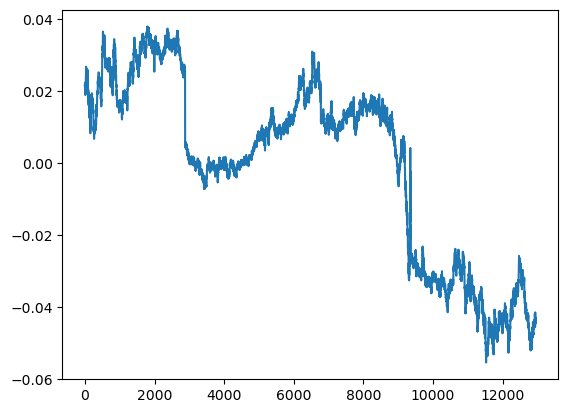

In [13]:
test = pd.DataFrame(index=data_frames[0].index)

# -1.20236881 , 1.27315312
# Put weights here to plot graph of spread
test['close'] = 0.77089403  * data_frames[0]["close"] - 0.74935151*data_frames[1]["close"]
test

test = test.reset_index(drop=True)

plt.plot(test['close'])
